**维度灾难**(Curse of Dimensionality)：指在高维情形下出现的数据样本稀疏、距离计算困难等问题。

降维的目的：环节维度灾难、对数据进行可视化。

### 主成分分析
**主成分分析**(Principal Component Analysis, PCA)的最优化问题就是求解$XX^T$的特征值，将求得的特征值排序：$\lambda_1\geq \lambda_2 \geq \cdots \geq \lambda_n$，然后取前$d$个特征值对应的特征向量构成$W=(w_1,w_2,\cdots,w_d)$。

PCA算法
输入：样本集$D=\{\vec{x}_1,\vec{x}_2,\cdots,\vec{x}_N\}$；低维空间维数$d$。
输出：投影矩阵$W=\{\vec{w}_1,\vec{w}_2,\cdots,\vec{w}_d\}$。

算法步骤：
> 1. 对所有样本进行中心化操作：$$\vec{x}_i \leftarrow \vec{x}_i-\frac{1}{N}\sum_{j=1}^N\vec{x}_j$$
> 2. 计算样本的协方差矩阵$XX^T$
> 3. 对协方差矩阵$XX^T$做特征值分解
> 4. 取最大的$d$个特征值对应的特征向量$\vec{w}_1,\vec{w}_2,\cdots,\vec{w}_d$，构造投影矩阵$W$

低维空间维数$d$的选取方法：
- 通过交叉验证法选取较好的$d$（在降维后的学习器的性能比较好）
- 从算法原理的角度设置一个阈值，如$t = 95%$，然后选取使得下式成立的最小的$d$的值：$$\frac{\sum_{i=1}^d\lambda_i}{\sum_{i=1}^n\lambda_i}\geq t$$

### 奇异值分解(SVD)
SVD奇异值分解等价于PCA主成分分析，核心就是求解$XX^T$的特征值以及对应的特征向量。

### 核主成分分析(Kernelized PCA，KPCA)
- 非线性降维

### 流形学习降维

### 多维缩放降维(Multiple Dimensional Scaling, MDS)
- 要求原始空间中样本之间的距离在低维空间中得到保持。

### 等度量映射降维(Isomap)

### 局部线性嵌入(Locally Linear Embedding, LLE)
- 目标：保持邻域内样本之间的线性关系。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, decomposition, manifold

In [2]:
def load_data():
    iris = datasets.load_iris()
    return iris.data, iris.target

____
### 实战
#### PCA
**sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, svd_solver=’auto’, tol=0.0, iterated_power=’auto’, random_state=None)**
> 1. n_components：指定降维后的维数。
    - 若为None，其值为min(n_samples, n_features)
    - 若为字符串mle，使用Minka's MLE算法来猜测降维后的维数。
    - 若为大于0、小于1的浮点数，则降维后的维数占原始维数的百分比。
> 2. copy：若为False，则直接使用原始数据来训练，结果会覆盖原始数据所在的数组。
    
属性：
> 1. components_：主成分数组；
> 2. explained_variance_ratio_：一个数组，元素是每个主成分的explained variance的比例；
> 3. mean_：一个数组，元素是每个特征的统计平均值；
> 4. n_components_：一个整数，指示主成分有多少个元素。

方法：
> 1. fit(X[, y])：训练模型；
> 2. transform(X)：执行降维；
> 3. fit_transform(X[, y])：训练模型并且降维；
> 4. inverse_transform(X)：执行升维，将数据从低位空间逆向转换到原始空间。

> decomposition.PCA基于scipy.linalg来实现SVD分解，因此它不能应用于稀疏矩阵，并且**无法适用于超大规模数据**。

In [4]:
def test_PCA(*data):
    X, y = data
    pca = decomposition.PCA(n_components=None)
    pca.fit(X)
    print('explained variance ratio: %s' % str(pca.explained_variance_ratio_))
    
X, y = load_data()
test_PCA(X, y)

explained variance ratio: [0.92461872 0.05306648 0.01710261 0.00521218]


四个特征值的比例如上述，可将其原始特征降低到2维。

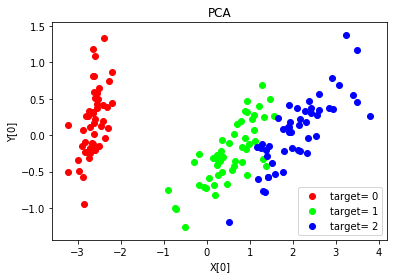

In [14]:
def plot_PCA(*data):
    X, y = data
    pca = decomposition.PCA(n_components=2)
    pca.fit(X)
    X_r = pca.transform(X)
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    colors = ((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),
             (0,0.6,0.4),(0.5,0.3,0.2),)
    for label, color in zip(np.unique(y), colors):
        position = y == label
        # 绘制label为y的数据
        ax.scatter(X_r[position, 0], X_r[position, 1], label="target= %d"%label, color=color)
    
    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[0]")
    ax.legend(loc="best")
    ax.set_title("PCA")
    plt.show()
    
plot_PCA(X, y)

#### IncrementalPCA
- 适用于超大规模数据，可将数据分批加载进内存。

**sklearn.decomposition.IncrementalPCA(n_components=None, whiten=False, copy=True, batch_size=None)**
> 1. batch_size：整数或者None，指定每个批次训练时，使用的样本数量。只有当调用fit()/partial_fit()方法时会用到该参数。

属性：
> 1. components_：主成分数组；
> 2. explained_variance_：每个成分对应的explained variance。
> 3. explained_variance_ratio_：一个数组，元素是每个主成分的explained variance的比例；
> 4. mean_：一个数组，元素是每个特征的统计平均值；
> 5. var_：一个数组，元素是每个特征的经验方差。每调用一次partial_fit()，就会更新一次该属性。
> 6. n_components_：一个整数，指示主成分有多少个元素。
> 7. n_samples_seen_：一个整数，指示目前已经处理了多少个样本。

方法：
> 1. fit(X[, y])：训练模型，使用batch_size个样本；
> 2. partial_fit(X[, y, check_input])：继续训练模型，使用batch_size个样本。
> 3. transform(X)：执行降维；
> 4. fit_transform(X[, y])：训练模型并且降维；
> 5. inverse_transform(X)：执行升维，将数据从低位空间逆向转换到原始空间。

#### KernelPCA
**sklearn.decomposition.KernelPCA(n_components=None, kernel='linear', gamma=None, degree=3, coef0=1, kernel_params=None, alpha=1.0, fit_inverse_transform=False, eigen_solver='auto', tol=0, max_iter=None, remove_zero_eig=False, random_state=None, copy_X=True, n_jobs=None)**
> 1. kernel：字符串，指定核函数。
    - linear：线性核$K(\vec{x},\vec{x})=\vec{x}\cdot \vec{z}$
    - poly：多项式核，$K(\vec{x},\vec{x})=(\gamma(\vec{x}\cdot\vec{z}+1)+r)^p$，其中$p$由degree参数决定，$\gamma$由gamma参数决定，$r$由coef0参数决定。
    - rbf(默认值)：高斯核函数，$K(\vec{x},\vec{x})=exp(-\gamma ||\vec{x}-\vec{z}||^2)$。
    - sigmoid：$K(\vec{x},\vec{x})=tanh(\gamma(\vec{x}\vec{z})+r)$。
> 2. degree：一个整数，当核函数是多项式核函数时，指定多项式的系数。
> 3. gamma：一个浮点数，为核函数的系数。默认为1/n_features。
> 4. coef0：浮点数，指定核函数中的自由项。
> 5. alpha：整数，岭回归的超参数，用于计算逆转换矩阵。
> 6. fit_inverse_transform：布尔值。若为True，需要计算逆转换矩阵。
> 7. eigen_solver：字符串，指定求解特征值的算法。
    - auto：自动选择
    - dense：dense特征值求解器
    - arpack：用于当特征数量远小于样本数量的情形。
> 8. remove_zero_eig：布尔值，若为True，则移除所有为零的特征值。

属性：
> 1. lambdas_：核化矩阵的特征值。
> 2. alphas_：核化矩阵的特征向量。
> 3. dual_coef_：逆转换矩阵。

方法：
> 1. fit(X[, y])：训练模型；
> 2. transform(X)：执行降维；
> 3. fit_transform(X[, y])：训练模型并且降维；
> 4. inverse_transform(X)：执行升维，将数据从低位空间逆向转换到原始空间。

In [15]:
def test_KPCA(*data):
    X, y = data
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    for kernel in kernels:
        kpca = decomposition.KernelPCA(n_components=None, kernel=kernel)
        kpca.fit(X)
        print('kernel=%s --> lambdas: %s' % (kernel, kpca.lambdas_))
        
test_KPCA(X, y)

kernel=linear --> lambdas: [6.30008014e+02 3.61579414e+01 1.16532155e+01 3.55142885e+00
 3.06082097e-12 5.63790036e-13 3.18245866e-13 2.55128333e-13
 1.47174261e-13 1.29117404e-13 3.73034936e-14 3.05656444e-14
 2.58839702e-14 2.41416397e-14 2.38111984e-14 2.02222845e-14
 1.91413038e-14 1.87583132e-14 1.77270180e-14 1.67505553e-14
 1.57741834e-14 1.54718590e-14 1.51273467e-14 1.49809726e-14
 1.49525867e-14 1.40734466e-14 1.29744807e-14 1.17093097e-14
 1.15239361e-14 1.01571997e-14 1.00368989e-14 9.39153260e-15
 8.89391845e-15 8.85093011e-15 8.73631790e-15 8.53926516e-15
 8.47484161e-15 7.94933028e-15 7.87583121e-15 7.01108030e-15
 6.86940203e-15 6.56297015e-15 6.51034551e-15 6.10127051e-15
 5.96850469e-15 5.64737698e-15 5.48912477e-15 5.09524380e-15
 4.81881460e-15 4.66981998e-15 4.63960054e-15 4.62297487e-15
 4.50454373e-15 4.38458971e-15 4.32426773e-15 4.28220895e-15
 4.20925740e-15 3.97481650e-15 3.94881332e-15 3.82253584e-15
 3.79672289e-15 3.55105836e-15 3.02690691e-15 2.77729392e-

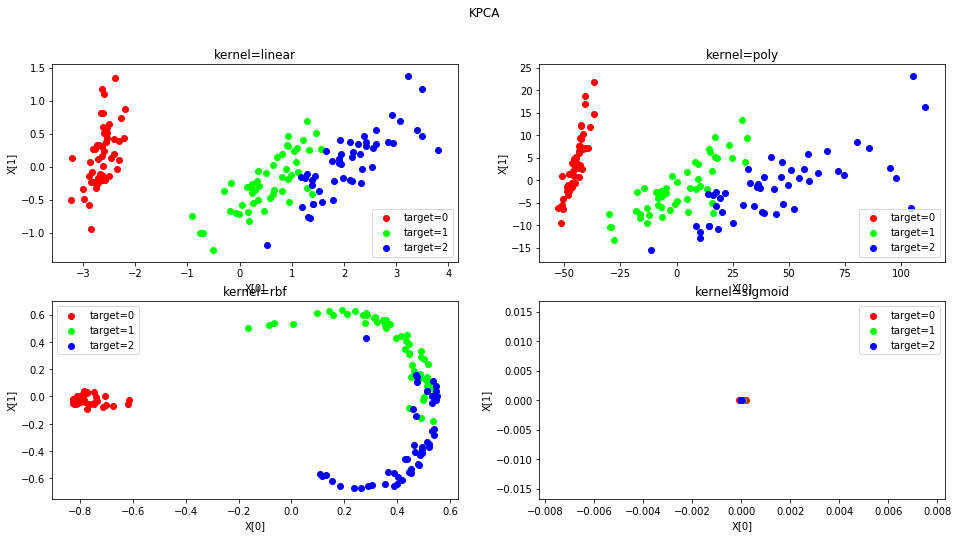

In [19]:
def plot_KPCA(*data):
    X, y = data
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    fig = plt.figure(figsize=(16, 8))
    colors = ((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),
             (0,0.6,0.4),(0.5,0.3,0.2),)
    
    for i, kernel in enumerate(kernels):
        kpca = decomposition.KernelPCA(n_components=2, kernel=kernel)
        kpca.fit(X)
        X_r = kpca.transform(X)
        ax = fig.add_subplot(2, 2, i+1)
        for label, color in zip(np.unique(y), colors):
            position = y == label
            ax.scatter(X_r[position, 0], X_r[position, 1], label="target=%d"%label, color=color)
        ax.set_xlabel("X[0]")
        ax.set_ylabel("X[1]")
        ax.legend(loc="best")
        ax.set_title("kernel=%s"%kernel)
    plt.suptitle("KPCA")
    plt.show()
    
plot_KPCA(X, y)

#### MDS
**sklearn.manifold.MDS(n_components=2, metric=True, n_init=4, max_iter=300, verbose=0, eps=0.001, n_jobs=None, random_state=None, dissimilarity='euclidean')**
> 1. metric：布尔值。若为True，则使用距离度量；否则使用非距离度量SMACOF。
> 2. n_init：整数。指定初始化的次数。在使用SMACOF算法时，会选择n_init次不同的初始值，然后选择这些结果中最好的那个作为最终结果。
> 3. eps：浮点数，指定收敛阈值。
> 4. dissimilarity：字符串。定义如何计算不相似度。
    - euclidean：欧式距离
    - precomputed：由使用者提供距离矩阵。
    
属性：
> 1. embedding_：给出原始数据集在低维空间中的嵌入矩阵。
> 2. stress_：浮点数，给出了不一致的距离的总和。其不能用于判定降维效果的好坏，只是一个中性指标。

方法：
> 1. fit(X[, y, init])：训练模型；
> 2. fit_transform(X[, y, init])：训练模型并返回转换后的低维坐标。

In [20]:
def test_MDS(*data):
    X, y = data
    for n in [4, 3, 2, 1]:
        mds = manifold.MDS(n_components=n)
        mds.fit(X)
        print("stress(n_components=%d) : %s"% (n, str(mds.stress_)))
        
test_MDS(X, y)

stress(n_components=4) : 11.417579206747908
stress(n_components=3) : 13.61003363541966
stress(n_components=2) : 133.7953792955243
stress(n_components=1) : 3398.140030839844


#### Isomap
**sklearn.manifold.Isomap(n_neighbors=5, n_components=2, eigen_solver='auto', tol=0, max_iter=None, path_method='auto', neighbors_algorithm='auto')**
> 1. n_neighbors：整数，指定近邻参数$k$；
> 2. tol：浮点数。指定求解特征值算法的收敛阈值；当eigen_solver为dense时，该参数无用。
> 3. path_method：字符串。指定寻找最短路径算法。
    - auto：由算法自动选取。
    - FW：使用Floyd_Warshall算法
    - D：使用Dijkstra算法
> 4. neighbors_algorithm：字符串。指定计算最近邻的算法。
    - ball_tree：使用BallTree算法
    - kd_tree：使用KDTree算法
    - brute：使用暴力搜索法
    - auto：自动决定最合适的算法
    
属性：
> 1. embedding_：给出原始数据集在低维空间中的嵌入矩阵
> 2. training_data_：存储原始训练数据
> 3. dist_matrix_：存储原始训练数据的距离矩阵

方法：
> 1. fit(X[, y])：训练模型
> 2. transform(X)：转换X到低维空间
> 3. fit_transform(X[, y])：训练模型并将原始数据集转换到低维空间
> 4. reconstruction_error()：计算重构误差

In [22]:
def test_Isomap(*data):
    X, y = data
    for n in [4, 3, 2, 1]:
        isomap = manifold.Isomap(n_components=n)
        isomap.fit(X)
        print('reconstruction_error(n_components=%d) : %s' % (n, isomap.reconstruction_error()))
        
test_Isomap(X, y)

reconstruction_error(n_components=4) : 1.0094929893039135
reconstruction_error(n_components=3) : 1.0181252006659842
reconstruction_error(n_components=2) : 1.0275229261937573
reconstruction_error(n_components=1) : 1.0715321251523142


#### LLE
**sklearn.manifold.LocallyLinearEmbedding(n_neighbors=5, n_components=2, reg=0.001, eigen_solver='auto', tol=1e-06, max_iter=100, method='standard', hessian_tol=0.0001, modified_tol=1e-12, neighbors_algorithm='auto', random_state=None, n_jobs=None)**
> 1. reg：浮点数，正则化项的系数。
> 2. method：字符串，指定LLE算法的形式。
    - standard：使用标准的LLE算法
    - hessian：使用Hessian eignmap算法
    - modified：使用modified LLE算法
    - ltsa：使用local tangent space alignment算法
    
属性：
> 1. embedding_vectors_：给出原始数据在低维空间的嵌入矩阵
> 2. reconstruction_error_：给出重构误差

方法：
> 1. fit(X[, y])：训练模型
> 2. transform(X)：转换X到低维空间
> 3. fit_transform(X[, y])：训练模型并将原始数据集转换到低维空间

In [23]:
def test_LocallyLinearEmbedding(*data):
    X, y = data
    for n in [4, 3, 2, 1]:
        lle = manifold.LocallyLinearEmbedding(n_components=n)
        lle.fit(X)
        print('reconstruction_error(n_components=%d) : %s' % (n, lle.reconstruction_error_))
        
test_LocallyLinearEmbedding(X, y)

reconstruction_error(n_components=4) : 1.7884357073700856e-06
reconstruction_error(n_components=3) : 3.992905833832323e-07
reconstruction_error(n_components=2) : 6.641419804939965e-08
reconstruction_error(n_components=1) : -7.327727551613664e-16


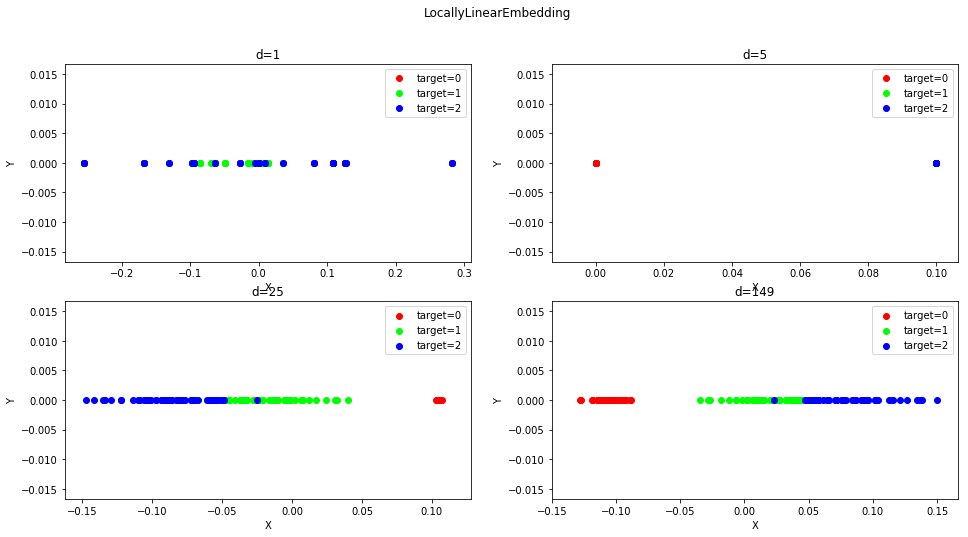

In [27]:
def plot_LocallyLinearEmbedding_k_d1(*data):
    X, y = data
    Ks = [1, 5, 25, y.size - 1]
    fig = plt.figure(figsize=(16, 8))
    for i, k in enumerate(Ks):
        lle = manifold.LocallyLinearEmbedding(n_components=1, n_neighbors=k)
        X_r = lle.fit_transform(X)
        
        ax = fig.add_subplot(2, 2, i + 1)
        colors = ((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),
             (0,0.6,0.4),(0.5,0.3,0.2),)
        for label, color in zip(np.unique(y), colors):
            position = y == label
            ax.scatter(X_r[position], np.zeros_like(X_r[position]), label="target=%d"%label, color=color)
        
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.legend(loc="best")
        ax.set_title("d=%d"%k)
    plt.suptitle("LocallyLinearEmbedding")
    plt.show()
    
plot_LocallyLinearEmbedding_k_d1(X, y)